In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

In [3]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

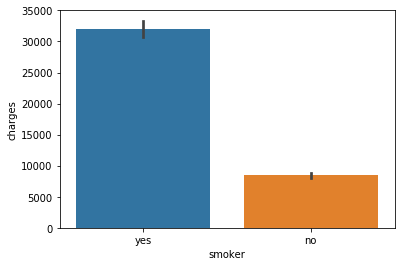

In [4]:
sns.barplot(x="smoker",y="charges",data=df)

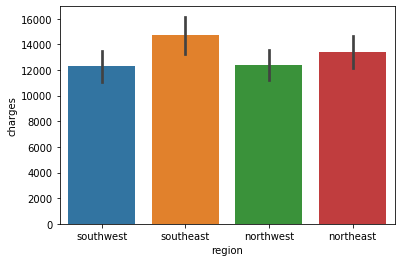

In [5]:
sns.barplot(x="region",y="charges",data=df)

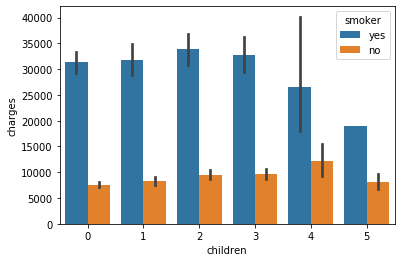

In [8]:
sns.barplot(x="children",y="charges",hue='smoker',data=df)

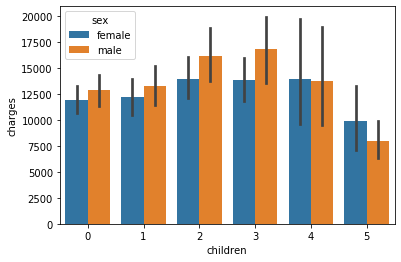

In [9]:
sns.barplot(x="children",y="charges",hue='sex',data=df)

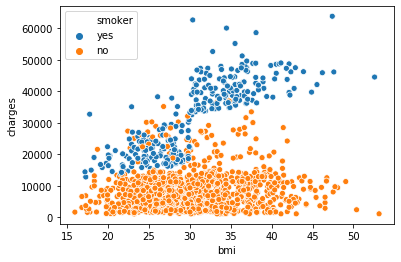

In [11]:
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df)

In [14]:
st.pearsonr(df.bmi,df.charges)

(0.1983409688336289, 2.459085535117846e-13)

(0.8064806070155406, 5.019668631794899e-64)


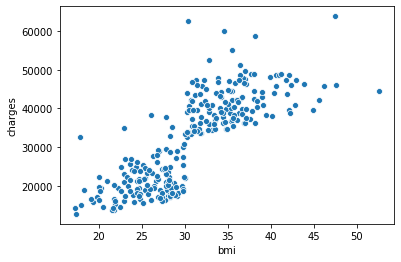

In [13]:
sns.scatterplot(x='bmi',y='charges',data=df[df.smoker=='yes'])
print(st.pearsonr(df[df.smoker=='yes'].bmi,df[df.smoker=='yes'].charges))

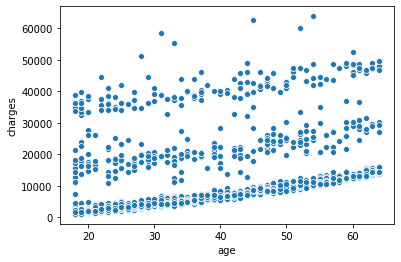

In [15]:
sns.scatterplot(df.age,df.charges)

In [23]:
def custom_func(sex,smoker):
    if sex=="male" and smoker=="yes":
        return "male_smoker"
    elif sex=="female" and smoker=="yes":
        return "female_smoker"
    elif sex=="female" and smoker=="no":
        return "female_nonsmoker"
    else:
        return "male_nonsmoker"

In [26]:
df["sex_smoking"]=df[['sex','smoker']].apply(lambda x: custom_func(x['sex'],x['smoker']) ,axis=1)

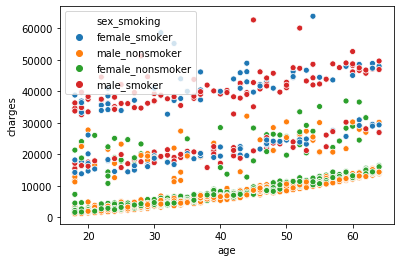

In [27]:
sns.scatterplot(x='age',y='charges',hue='sex_smoking',data=df)

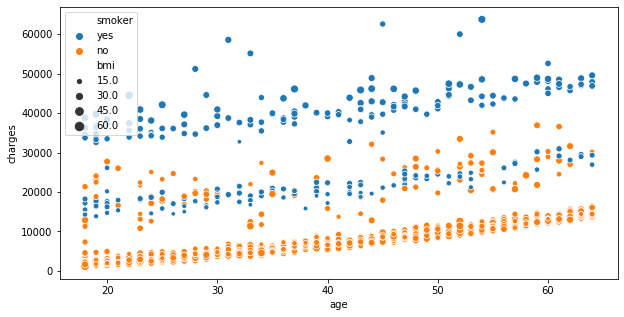

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age',y='charges',size='bmi',hue='smoker',data=df)

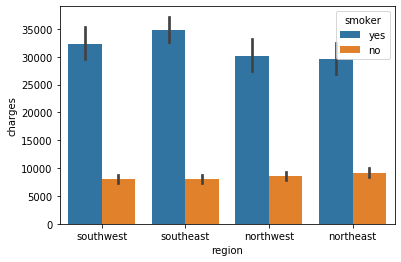

In [21]:
sns.barplot(x="region",y="charges",hue='smoker',data=df)

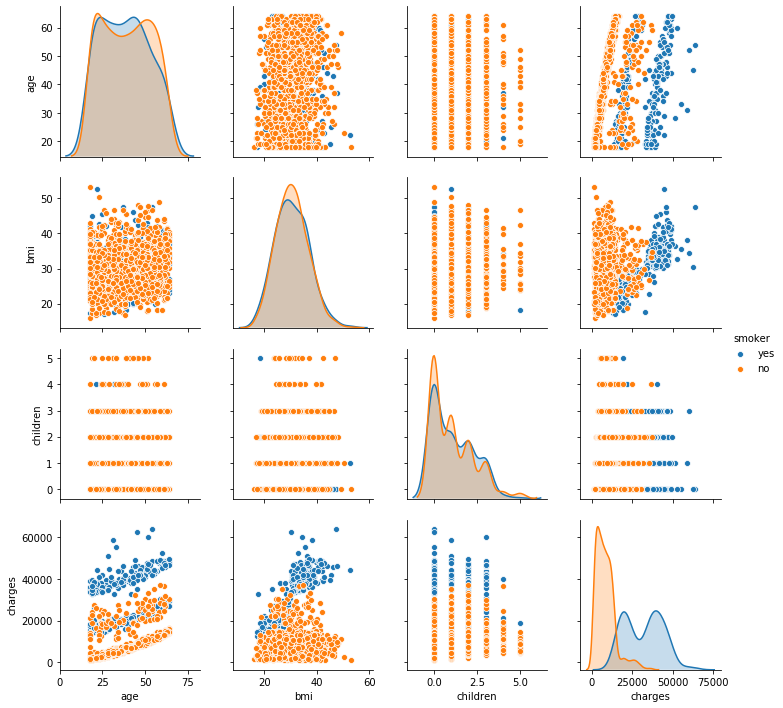

In [30]:
sns.pairplot(df,hue='smoker')

# Data Prep

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_smoking'],
      dtype='object')

In [33]:
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].copy()
y=df['charges'].copy()

In [35]:
#clean sex col
X.sex=X.sex.map(lambda x: 1 if x=='male' else 0)

In [36]:
#clean smoker col
X.smoker=X.smoker.map(lambda x: 1 if x=="yes" else 0)

In [38]:
#region
dummies=pd.get_dummies(X.region)
X=X.join(dummies)
X=X.drop(["region"],axis=1)

# Model
Goal: slopes & intercept

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#model
for col,m in zip(X.columns,lr.coef_):
    print(col,"*",m,"+")
print(lr.intercept_)

age * 256.8563525373483 +
sex * -131.3143593951065 +
bmi * 339.19345361083674 +
children * 475.50054514913245 +
smoker * 23848.534541912803 +
northeast * 587.0092350283235 +
northwest * 234.04533560368407 +
southeast * -448.01281435949545 +
southwest * -373.04175627250885 +
-12525.547811195444


In [42]:
y_hat=lr.predict(X)
residual=y-y_hat

In [44]:
#sum(residual**2)/len(y)
from sklearn.metrics import mean_squared_error, r2_score
print("MSE",mean_squared_error(y,y_hat))
print("R_sq",r2_score(y,y_hat))

MSE 36501893.00741544
R_sq 0.7509130345985207


# Testing The Regression Model

In [45]:
#assumption 1: sum of residuals = 0
sum(residual)

-4.195499059278518e-09

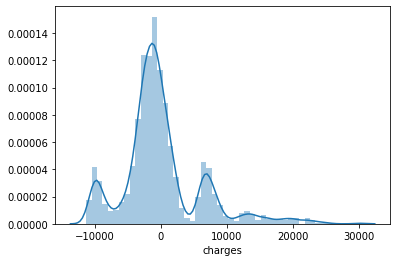

In [46]:
sns.distplot(residual)

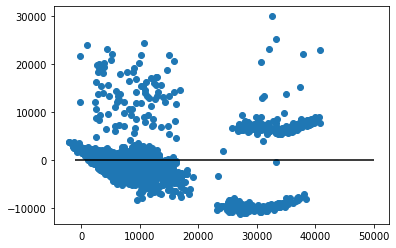

In [48]:
plt.scatter(y_hat,residual)
plt.hlines(y=0,xmin=-1000,xmax=50000)
#look for homoscadacity

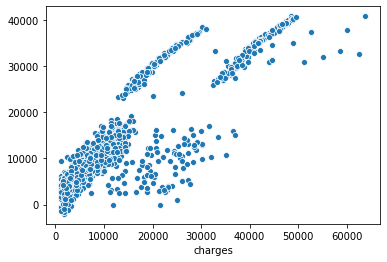

In [51]:
sns.scatterplot(y,y_hat)

In [54]:
df[abs(residual)>10000]

,age,sex,bmi,children,smoker,region,charges,sex_smoking
3,33,male,22.705,0,no,northwest,21984.47061,male_nonsmoker
9,60,female,25.840,0,no,northwest,28923.13692,female_nonsmoker
34,28,male,36.400,1,yes,southwest,51194.55914,male_smoker
62,64,male,24.700,1,no,northwest,30166.61817,male_nonsmoker
85,45,male,22.895,2,yes,northwest,21098.55405,male_smoker
...,...,...,...,...,...,...,...,...
1258,55,male,37.715,3,no,northwest,30063.58055,male_nonsmoker
1300,45,male,30.360,0,yes,southeast,62592.87309,male_smoker
1304,42,male,24.605,2,yes,northeast,21259.37795,male_smoker
1306,29,female,21.850,0,yes,northeast,16115.30450,female_smoker


# EDA V2

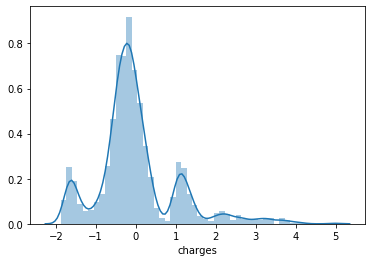

In [57]:
z=(residual-residual.mean())/residual.std()
#df[abs(z)>3]
sns.distplot(z)

In [62]:
def fit_smoking(smoker,bmi):
    if smoker=="yes" and bmi>30:
        return "Fat_Smoker"
    elif smoker=="yes" and bmi<=30:
        return "Fit_Smoker"
    elif smoker=="no" and bmi>30:
        return "Fat"
    else:
        return "Fit"
df["Smoking_Fit"]=df[["smoker","bmi"]].\
            apply(lambda x: fit_smoking(x["smoker"],x["bmi"]),axis=1)

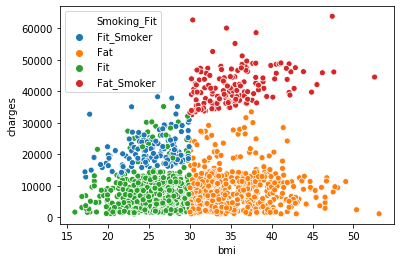

In [64]:
sns.scatterplot(x="bmi",y='charges',hue='Smoking_Fit',data=df)

In [67]:
X=df[~((df.Smoking_Fit=="Fit") & (df.charges>=15000))]

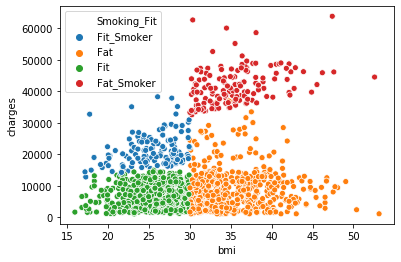

In [69]:
sns.scatterplot(x="bmi",y='charges',hue='Smoking_Fit',data=X)

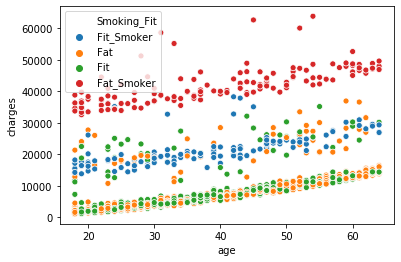

In [63]:
sns.scatterplot(x="age",y='charges',hue='Smoking_Fit',data=df)

# Model v2.. data Prep

In [71]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_smoking', 'Smoking_Fit'],
      dtype='object')

In [76]:
X=df[['age', 'sex', 'bmi', 'children', 'region', 'Smoking_Fit']].copy()
y=df[ 'charges'].copy()

In [77]:
X.sex=X.sex.map(lambda x: 1 if x=="male" else 0)
X=X.join(pd.get_dummies(X.region)).drop(['region'],axis=1)
X=X.join(pd.get_dummies(X.Smoking_Fit)).drop(['Smoking_Fit'],axis=1)

In [79]:
lr=LinearRegression()
lr.fit(X,y)
y_hat=lr.predict(X)
residual=y-y_hat
print("r_sq",r2_score(y,y_hat))

r_sq 0.8655808406989334


In [80]:
for m,col in zip(lr.coef_,X.columns):
    print(m,"*",col,"+")
print(lr.intercept_)

263.63763960129506 * age +
-470.1372400317653 * sex +
108.95918259626632 * bmi +
508.9660135937911 * children +
562.9340558913846 * northeast +
299.1962200501144 * northwest +
-259.34208750266345 * southeast +
-602.7881884388318 * southwest +
-12085.550495987474 * Fat +
21237.327181893506 * Fat_Smoker +
-11282.491902475685 * Fit +
2130.715216569654 * Fit_Smoker +
6097.231370486627


3.892637323588133e-10


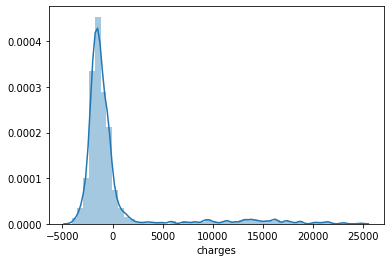

In [81]:
print(sum(residual))
sns.distplot(residual)

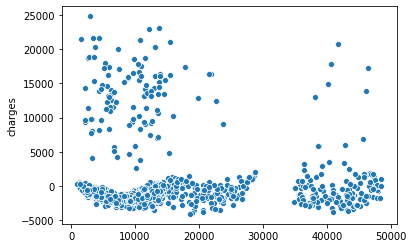

In [82]:
sns.scatterplot(y_hat,residual)

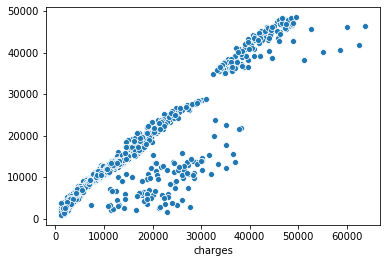

In [83]:
sns.scatterplot(y,y_hat)

In [ ]:
# Cross-Validataion....
#80:20; 70:30 Rules
#80% data to train the model; keep 20% data to test the model....

In [112]:
#split the data into two parts....
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

In [113]:
print("training set size",len(X_train))
print("testing set size",len(X_test))

training set size 1070
testing set size 268


In [123]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print("R_squared Error for training",lr.score(X_train,y_train))
print("R_squared Error for testing",lr.score(X_test,y_test))

R_squared Error for training 0.8620001209528458
R_squared Error for testing 0.8788724670098111


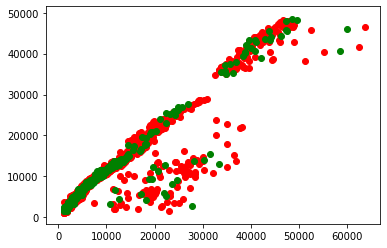

In [124]:
plt.scatter(y_train,lr.predict(X_train),color="r")
plt.scatter(y_test,lr.predict(X_test),color='g')

In [126]:
lr.predict(X[:5])

array([16054.16381465,  2030.94287912,  5509.74813407,  5959.28236923,
        6379.54109432])

In [127]:
df["y_hat"]=lr.predict(X)
df.to_csv("output.csv",index=None)

In [125]:
import pickle
with open('model_v1.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(lr, f, pickle.HIGHEST_PROTOCOL)


In [116]:
for m,col in zip(lr.coef_,X_train.columns):
    print(m,"*",col,"+")
print(lr.intercept_)

264.8095236566609 * age +
-544.7635143566346 * sex +
110.94222651750337 * bmi +
458.06776639748324 * children +
512.3462911473458 * northeast +
344.56683421696147 * northwest +
-339.6990302687959 * southeast +
-517.2140950955176 * southwest +
-12192.23276754837 * Fat +
21118.662430672033 * Fat_Smoker +
-11234.658493966754 * Fit +
2308.2288308430966 * Fit_Smoker +
6136.4800095837345


In [120]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=False)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)
lr=LinearRegression()
lr.fit(X_poly_train,y_train)
print("R_squared Error for training",lr.score(X_poly_train,y_train))
print("R_squared Error for testing",lr.score(X_poly_test,y_test))

R_squared Error for training 0.8713669950037568
R_squared Error for testing 0.8841123765008367
